The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)

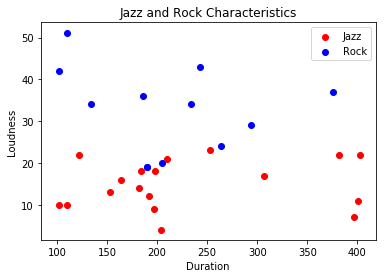

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

The simplest form of a similarity model is the Nearest Neighbor model. This works quite simply: when trying to predict an observation, we find the closest (or _nearest_) known observation in our training data and use that value to make our prediction. Here we'll use the model as a classifier, the outcome of interest will be a category.

To find which observation is "nearest" we need some kind of way to measure distance. Typically we use _Euclidean distance_, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

You might recognize this formula, (taking distances, squaring them, adding the squares together, and taking the root) as a generalization of the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) into n-dimensions. You can technically define any distance measure you want, and there are times where this customization may be valuable. As a general standard, however, we'll use Euclidean distance.

Now that we have a distance measure from each point in our training data to the point we're trying to predict the model can find the datapoint with the smallest distance and then apply that category to our prediction.

The simplest solution to the NNS problem is to compute the distance from the query point to every other point in the database, keeping track of the "best so far". This algorithm, sometimes referred to as the naive approach, has a running time of O(dN) where N is the cardinality of S and d is the dimensionality of M. There are no search data structures to maintain, so linear search has no space complexity beyond the storage of the database. Naive search can, on average, outperform space partitioning approaches on higher dimensional spaces.[3]

In [3]:
# Empty list for the distances between the song to predict and each of the data points. 
time_list = []
# After looping through both the duration and loudness variables for each data point
for x, y, category in zip(music['loudness'], music['duration'], music['jazz']):
    # Append the Euclidean distance for the song to predict and each of the data points to the time_list.
    time_list.append(math.sqrt((x - 24)**2 + (y - 190)**2))
# Create a column in the music dataframe with the distances.
music['distance'] = time_list

In [4]:
# Print out the jazz or rock category by finding the minimum Euclidean distance from the dataframe. 
music.jazz[music['distance'] == min(time_list)]

16    0
25    0
Name: jazz, dtype: int64

In [5]:
# Test it against the SKLearn package on the music dataset from above to ensure that it's correct.
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])